In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
!pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
import json
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Embedding, Flatten,Dense
from tensorflow import keras
import tensorflow_addons as tfa

from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

In [86]:
train_file_path = "/content/drive/MyDrive/assign2/comp90051-22-s2-authorship/train.json"
test_file_path = "/content/drive/MyDrive/assign2/comp90051-22-s2-authorship/test.json"

with open(train_file_path, 'r') as f:
    data = json.load(f)
df_train = pd.DataFrame(data)

with open(test_file_path, 'r') as f:
    data = json.load(f)
df_test = pd.DataFrame(data)

In [87]:
print(df_train.dtypes)
df_train

authors     object
year         int64
abstract    object
venue       object
title       object
dtype: object


,authors,year,abstract,venue,title
0,"[42, 13720, 36]",9,"[2455, 1858, 2335, 1543, 1800, 1860, 2000, 286...",20,"[41, 1550, 1563, 1594, 1544, 1919, 1644, 37, 1..."
1,"[1359, 15881, 45]",15,"[40, 1542, 1691, 2449, 1535, 3616, 2206, 1904,...",2,"[1731, 47, 11, 57, 4624, 1525, 1535, 47, 11, 3..."
2,"[19166, 17763]",17,"[40, 1542, 1691, 2449, 1535, 2610, 1543, 1535,...",,"[2085, 1719, 1846, 1745, 2243, 1553, 1606, 159..."
3,[97],10,"[46, 1624, 1547, 56, 1687, 1644, 6, 7, 3386, 1...",4,"[40, 1733, 1735, 1540, 1655, 46, 1624, 1547, 5..."
4,"[19617, 2]",10,"[37, 3709, 3836, 1586, 2151, 1727, 3021, 1860,...",9,"[38, 1592, 2088, 1543, 1574, 1727, 1597, 1813,..."
...,...,...,...,...,...
25788,"[1797, 78]",14,"[46, 1605, 1681, 10, 1557, 4741, 1535, 2021, 1...",1,"[46, 1910, 36, 2107, 1547, 1553, 1716, 1528, 5..."
25789,"[18357, 11563, 7905]",11,"[46, 1605, 1691, 10, 2551, 4168, 2030, 3134, 1...",278,"[47, 1574, 1541, 1549, 47, 1966, 2114, 112, 12..."
25790,"[2236, 20436, 10501]",7,"[1611, 1543, 1535, 2817, 2073, 1647, 11, 2933,...",17,"[56, 1718, 3012, 56, 1902, 2160, 1546, 1623, 1..."
25791,"[3921, 8760]",16,"[37, 1662, 33, 2007, 1669, 4981, 1650, 1527, 1...",0,"[3066, 1728, 11, 1546, 11, 3066, 1728, 1531, 1..."


In [88]:
print(df_test.dtypes)
df_test

identifier     int64
coauthors     object
year           int64
abstract      object
venue         object
title         object
dtype: object


,identifier,coauthors,year,abstract,venue,title
0,0,"[16336, 1762, 4357, 12564]",19,"[37, 1662, 3207, 10, 33, 2037, 1738, 1642, 155...",223,"[3207, 24, 1798, 1738, 37, 2375, 1568, 11, 53,..."
1,1,"[21189, 14088]",19,"[1731, 2130, 3674, 1705, 1656, 3077, 1546, 367...",223,"[40, 1560, 1536, 1544, 1609, 1705, 1658, 1543,..."
2,2,"[3625, 1198, 19889, 794, 2749, 7801]",19,"[1551, 1728, 3920, 1542, 1535, 1656, 1543, 153...",7,"[47, 1574, 1729, 1641, 11, 37, 2533, 2015, 47,..."
3,3,"[19810, 15173, 5876, 111]",19,"[51, 1535, 2115, 1543, 1811, 1700, 1657, 1684,...",21,"[1770, 53, 2054, 1549, 1529, 1723, 2796, 1547,..."
4,4,"[10932, 7668, 11907, 19601, 15307, 10492, 1049...",19,"[1775, 1746, 1842, 1525, 33, 2551, 1882, 1542,...",,"[18, 1924, 23, 1544, 3927, 2686, 1543, 1535, 1..."
...,...,...,...,...,...,...
795,795,"[2964, 9493]",19,"[1657, 1533, 1681, 1527, 1667, 2295, 1916, 236...",223,"[2796, 1547, 1531, 1550, 2370, 51, 1549, 2600,..."
796,796,"[6305, 4866, 5741, 15334]",19,"[1618, 1552, 1630, 2367, 1613, 3600, 1857, 155...",0,"[37, 1747, 2188, 11, 3623, 57, 2103, 1555, 37,..."
797,797,"[4856, 5063]",19,"[37, 1662, 33, 2095, 1726, 2090, 1553, 2410, 2...",0,"[1621, 11, 1560, 1816, 2151, 1533, 1534, 37, 1..."
798,798,"[18095, 2884, 15373]",19,"[46, 2337, 11, 2116, 2185, 1839, 3154, 3057, 1...",460,"[1832, 1552, 10, 3585, 10, 35, 1889, 1597, 425..."


In [89]:
# Retrive the non-prolific author and prolific author index
non_prolific_author_index = []
prolific_author_index = []
for i,j in enumerate(df_train['authors']):
  sum = 0
  for k in j:
    if k < 100 and k >= 0:
      sum += 1
  if sum == 0:
    non_prolific_author_index.append(i)
  else:
    prolific_author_index.append(i)

df_non_prolifc_authors = df_train.drop(prolific_author_index)
df_prolific_authors = df_train.drop(non_prolific_author_index)




In [90]:
# Retrieve the prolific author as label
prolific_author_label = []
non_prolific_author_label = []
for i in df_prolific_authors['authors']:
  prolific_author_label_each_instance = []
  non_prolific_author_label_each_instance = []
  for j in i:
    if j >= 0 and j < 100:
      prolific_author_label_each_instance.append(j)
    else:
      non_prolific_author_label_each_instance.append(j)
  prolific_author_label.append(prolific_author_label_each_instance)
  non_prolific_author_label.append(non_prolific_author_label_each_instance)


df_prolific_authors['coauthors'] = non_prolific_author_label
# df_prolific_authors = df_prolific_authors.drop(['authors'],axis = 1)

In [91]:
df_prolific_authors

,authors,year,abstract,venue,title,coauthors
0,"[42, 13720, 36]",9,"[2455, 1858, 2335, 1543, 1800, 1860, 2000, 286...",20,"[41, 1550, 1563, 1594, 1544, 1919, 1644, 37, 1...",[13720]
1,"[1359, 15881, 45]",15,"[40, 1542, 1691, 2449, 1535, 3616, 2206, 1904,...",2,"[1731, 47, 11, 57, 4624, 1525, 1535, 47, 11, 3...","[1359, 15881]"
3,[97],10,"[46, 1624, 1547, 56, 1687, 1644, 6, 7, 3386, 1...",4,"[40, 1733, 1735, 1540, 1655, 46, 1624, 1547, 5...",[]
4,"[19617, 2]",10,"[37, 3709, 3836, 1586, 2151, 1727, 3021, 1860,...",9,"[38, 1592, 2088, 1543, 1574, 1727, 1597, 1813,...",[19617]
9,"[9641, 44, 5623, 2]",18,"[1731, 2021, 1543, 11, 1546, 11, 1647, 2163, 1...",0,"[1560, 1694, 11, 1546, 11, 3066, 1728, 47, 160...","[9641, 5623]"
...,...,...,...,...,...,...
25767,"[19974, 68, 8903]",1,"[40, 1542, 1691, 2449, 1535, 2855, 1549, 1755,...",23,"[1708, 33, 58, 57, 2174, 1548, 1538, 1553, 359...","[19974, 8903]"
25776,"[6353, 67, 3037, 15856, 13521]",10,"[40, 1542, 1691, 2907, 1540, 1535, 2121, 2431,...",10,"[53, 2555, 4480, 1535, 1637, 1898, 1549, 53, 3...","[6353, 3037, 15856, 13521]"
25778,"[7686, 3810, 87, 7451]",16,"[2144, 1661, 2151, 1966, 3776, 4864, 1546, 219...",31,"[1615, 1966, 11, 3238, 1653, 3318, 24, 2144, 1...","[7686, 3810, 7451]"
25781,"[14864, 92]",16,"[37, 1662, 33, 1814, 2036, 1692, 1553, 2333, 2...",0,"[46, 1670, 1826, 37, 1632, 46, 1991, 1525, 152...",[14864]


In [92]:
#One-hot encoding the labels
from sklearn.preprocessing import MultiLabelBinarizer
multilable_binarizer = MultiLabelBinarizer()
ohe_prolific_labels = multilable_binarizer.fit_transform(prolific_author_label).astype('float')


In [93]:
df_prolific_authors['sentences'] = df_prolific_authors['title'] + df_prolific_authors['abstract'] 
df_prolific_authors = df_prolific_authors.drop(['abstract','title'],axis = 1)

df_test['sentences'] = df_test['title'] + df_test['abstract'] 
df_test = df_test.drop(['abstract','title'],axis = 1)

In [13]:
# len(df_prolific_authors['sentences'][101]) 


In [94]:
from keras_preprocessing.sequence import pad_sequences
max_length_sectences = 512
sentences_list = []
for i in df_prolific_authors['sentences']:
  sentences_list.append(np.asarray(i))
sentences_list = np.array(sentences_list)
padded_sentences = pad_sequences(sentences_list,truncating = 'post',maxlen = max_length_sectences,padding ='post')
# df_prolific_authors = df_prolific_authors.drop(['sentences'],axis = 1)



#For test
test_sentences_list = []
for i in df_test['sentences']:
  test_sentences_list.append(np.asarray(i))
test_sentences_list = np.array(test_sentences_list)
test_padded_sentences = pad_sequences(test_sentences_list,truncating = 'post',maxlen = max_length_sectences,padding ='post')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  app.launch_new_instance()


In [15]:
padded_sentences

array([[  41, 1550, 1563, ...,    0,    0,    0],
       [1731,   47,   11, ...,    0,    0,    0],
       [  40, 1733, 1735, ...,    0,    0,    0],
       ...,
       [1615, 1966,   11, ...,    0,    0,    0],
       [  46, 1670, 1826, ...,    0,    0,    0],
       [  46, 1910,   36, ...,    0,    0,    0]], dtype=int32)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(padded_sentences, ohe_prolific_labels, test_size = 0.2, random_state = 1)

In [46]:
embedding_dimension = 32
vocabulary_size = 5000
embedding_model = tf.keras.Sequential([
    layers.Embedding(input_dim = vocabulary_size, output_dim = embedding_dimension,input_length = max_length_sectences),
    layers.GlobalAveragePooling1D(),
    layers.Dense(100,activation = 'sigmoid')
    # layers.Dense(512, activation="relu"),
    # layers.Dropout(0.1),
    # layers.Dense(400, activation="relu"),
    # layers.Dense(256, activation="relu"),
    # layers.Dropout(0.1),
    # layers.Dense(200, activation="relu"),
    # layers.Dense(128, activation="relu"),
    # layers.Dropout(0.1),
    # layers.Dense(100,activation="sigmoid"),
    
])
embedding_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 512, 32)           160000    
                                                                 
 global_average_pooling1d_1   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_37 (Dense)            (None, 512)               16896     
                                                                 
 dropout_18 (Dropout)        (None, 512)               0         
                                                                 
 dense_38 (Dense)            (None, 400)               205200    
                                                                 
 dense_39 (Dense)            (None, 256)               102656    
                                                      

In [47]:
metric = tfa.metrics.F1Score(num_classes=100, threshold=0.1, average= 'macro' )
# loss = tf.keras.losses.BinaryFocalCrossentropy(gamma=2,from_logits=False)
#metrics= ['categorical_accuracy']
optimizer = optimizers.Adam(learning_rate =0.001)
embedding_model.compile(loss= ['binary_crossentropy'], optimizer= optimizer, metrics = metric)
history = embedding_model.fit(X_train, y_train, epochs = 240, validation_data=(X_val,y_val),batch_size= 32)

Epoch 1/240
187/187 [==============================] - 4s 18ms/step - loss: 0.1230 - f1_score: 0.0210 - val_loss: 0.0644 - val_f1_score: 0.0000e+00
Epoch 2/240
187/187 [==============================] - 3s 18ms/step - loss: 0.0672 - f1_score: 0.0018 - val_loss: 0.0642 - val_f1_score: 0.0000e+00
Epoch 3/240
187/187 [==============================] - 3s 18ms/step - loss: 0.0663 - f1_score: 5.2589e-04 - val_loss: 0.0640 - val_f1_score: 0.0000e+00
Epoch 4/240
187/187 [==============================] - 3s 17ms/step - loss: 0.0661 - f1_score: 1.4085e-04 - val_loss: 0.0642 - val_f1_score: 0.0000e+00
Epoch 5/240
187/187 [==============================] - 3s 17ms/step - loss: 0.0657 - f1_score: 5.8769e-04 - val_loss: 0.0643 - val_f1_score: 0.0000e+00
Epoch 6/240
187/187 [==============================] - 3s 17ms/step - loss: 0.0655 - f1_score: 0.0079 - val_loss: 0.0639 - val_f1_score: 0.0000e+00
Epoch 7/240
187/187 [==============================] - 2s 12ms/step - loss: 0.0655 - f1_score: 0.003

KeyboardInterrupt: ignored

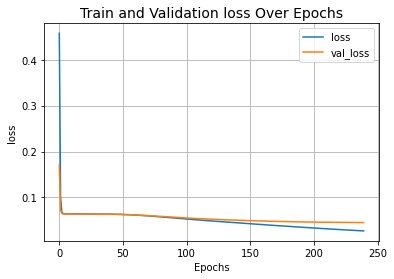

In [19]:
def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()
plot_result("loss")

In [95]:
output_flatten_model = keras.Model(inputs = embedding_model.input,outputs=embedding_model.layers[1].output)

#Train
train_embedded_sentences = output_flatten_model(padded_sentences)

#Test
test_embedded_sentences = output_flatten_model(test_padded_sentences)


In [97]:
#Train
numpy_train_text = train_embedded_sentences.numpy()
header_features_name = np.array(['text_feature ' + str(i) for i in range(32)])
train_text_features = np.vstack([header_features_name,numpy_train_text])
df_train_text_features = pd.DataFrame(train_text_features[1:],columns=train_text_features[0])
df_train_text_features = df_train_text_features.astype('float')

#test

numpy_test_text = test_embedded_sentences.numpy()
header_features_name = np.array(['text_feature ' + str(i) for i in range(32)])
test_text_features = np.vstack([header_features_name,numpy_test_text])
df_test_text_features = pd.DataFrame(test_text_features[1:],columns=test_text_features[0])
df_test_text_features = df_test_text_features.astype('float')




In [98]:

df_test_text_features

,text_feature 0,text_feature 1,text_feature 2,text_feature 3,text_feature 4,text_feature 5,text_feature 6,text_feature 7,text_feature 8,text_feature 9,...,text_feature 22,text_feature 23,text_feature 24,text_feature 25,text_feature 26,text_feature 27,text_feature 28,text_feature 29,text_feature 30,text_feature 31
0,0.003423,-0.001682,0.007636,-0.001795,0.004938,-0.000932,0.000710,0.001897,-0.002995,-0.001693,...,0.004400,0.001131,0.001895,-0.002777,-0.000667,-0.000718,0.001391,0.001564,0.003972,-0.000019
1,0.009227,-0.006928,0.000989,-0.006201,0.004747,-0.002855,0.008504,0.010936,0.001186,0.002163,...,0.008912,0.002740,0.003399,-0.003120,0.009978,-0.004753,-0.002287,0.001324,0.012962,0.008744
2,0.010415,-0.011440,-0.001585,-0.010532,0.002825,-0.008313,0.007096,0.010428,-0.002384,-0.002675,...,0.009765,0.006063,0.006882,-0.002514,-0.002568,0.003324,0.005210,-0.000112,0.016173,0.001741
3,-0.000320,-0.001440,-0.007946,-0.002064,-0.002643,-0.003207,-0.000028,0.000947,-0.003510,0.001644,...,-0.001845,-0.001635,0.001998,0.003654,0.002004,0.000896,0.001050,-0.003322,0.001602,0.006378
4,0.004953,-0.003562,0.001914,-0.004759,0.001189,-0.005847,0.000939,0.001944,-0.000126,0.000091,...,-0.000248,0.002085,0.003484,0.000386,-0.000014,0.002162,0.003670,0.001258,0.003931,0.002133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-0.001666,-0.004649,-0.003338,0.000569,-0.003977,-0.005542,0.004535,0.004735,0.004053,0.001467,...,-0.003054,0.003150,0.003906,0.002834,0.002533,-0.001931,0.000522,0.001674,0.004948,-0.000747
796,0.000052,-0.001413,-0.019848,0.003674,-0.011973,-0.002831,0.006040,0.003677,0.001024,0.015739,...,-0.005880,-0.000956,-0.002598,0.007431,0.013079,-0.008054,-0.004418,-0.006312,0.007505,0.007060
797,-0.000253,0.001240,-0.006030,0.003950,-0.000582,0.003880,-0.003452,-0.001404,-0.003514,0.000263,...,-0.002250,0.000999,-0.003815,0.000786,0.002129,-0.004590,-0.003334,-0.001096,-0.004239,0.002348
798,0.002479,-0.000427,0.006619,-0.002984,0.001680,-0.001367,0.003169,0.003830,0.000239,0.002511,...,0.004019,0.001358,0.003940,-0.000240,0.004383,-0.002088,0.002548,-0.003454,0.005391,0.003457


In [41]:
text_features_X_train, text_features_X_val, text_features_y_train, text_features_y_val = train_test_split(df_train_text_features, ohe_prolific_labels, test_size = 0.2)

In [42]:

classification_model = keras.Sequential(
        [
            layers.Dense(512, activation="relu",input_dim = text_features_X_train.shape[1]),
            layers.Dropout(0.1),
            layers.Dense(400, activation="relu"),
            layers.Dense(256, activation="relu"),
            layers.Dropout(0.1),
            layers.Dense(200, activation="relu"),
            layers.Dense(128, activation="relu"),
            layers.Dropout(0.1),
            layers.Dense(text_features_y_train.shape[1],activation="sigmoid"),
        ]  
    )
classification_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 512)               16896     
                                                                 
 dropout_15 (Dropout)        (None, 512)               0         
                                                                 
 dense_32 (Dense)            (None, 400)               205200    
                                                                 
 dense_33 (Dense)            (None, 256)               102656    
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_34 (Dense)            (None, 200)               51400     
                                                                 
 dense_35 (Dense)            (None, 128)              

In [43]:
classification_model.compile(loss= ['binary_crossentropy'], optimizer= optimizer, metrics = metric)

In [44]:
history_classification = classification_model.fit(text_features_X_train, text_features_y_train, epochs = 50, validation_data=(text_features_X_val,text_features_y_val),batch_size= 32)

Epoch 1/50
187/187 [==============================] - 2s 9ms/step - loss: 0.0815 - f1_score: 0.0772 - val_loss: 0.0642 - val_f1_score: 0.0000e+00
Epoch 2/50
187/187 [==============================] - 1s 7ms/step - loss: 0.0659 - f1_score: 5.2460e-04 - val_loss: 0.0641 - val_f1_score: 0.0000e+00
Epoch 3/50
187/187 [==============================] - 1s 8ms/step - loss: 0.0656 - f1_score: 6.2166e-04 - val_loss: 0.0639 - val_f1_score: 0.0000e+00
Epoch 4/50
187/187 [==============================] - 1s 8ms/step - loss: 0.0652 - f1_score: 5.1136e-04 - val_loss: 0.0639 - val_f1_score: 0.0000e+00
Epoch 5/50
187/187 [==============================] - 1s 8ms/step - loss: 0.0636 - f1_score: 0.0044 - val_loss: 0.0613 - val_f1_score: 0.0029
Epoch 6/50
187/187 [==============================] - 1s 8ms/step - loss: 0.0607 - f1_score: 0.0160 - val_loss: 0.0579 - val_f1_score: 0.0073
Epoch 7/50
187/187 [==============================] - 1s 7ms/step - loss: 0.0582 - f1_score: 0.0377 - val_loss: 0.0562 -

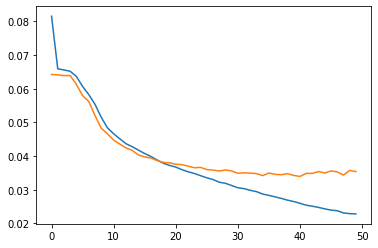

In [48]:
plt.plot(history_classification.history['loss'], label='loss')
plt.plot(history_classification.history["val_loss"], label="val_loss")
plt.show()

In [167]:
predicted_label = classification_model.predict(df_test_text_features)

In [168]:
predicted_label[5]

array([0.01843578, 0.02939507, 0.11436436, 0.00118488, 0.00078827,
       0.09480405, 0.158138  , 0.01449099, 0.1069687 , 0.06253904,
       0.00933191, 0.05954894, 0.04153061, 0.07143596, 0.2197426 ,
       0.08812267, 0.01986885, 0.13747138, 0.03255871, 0.15418506,
       0.00494158, 0.03953177, 0.0841848 , 0.02252313, 0.01089969,
       0.03915441, 0.05437446, 0.06259969, 0.12914807, 0.044168  ,
       0.03479332, 0.04453176, 0.06434804, 0.02443898, 0.01088437,
       0.03019127, 0.04871958, 0.07988548, 0.00151682, 0.04866722,
       0.01209441, 0.04244956, 0.01968417, 0.00569391, 0.04396525,
       0.02673978, 0.0467405 , 0.00207919, 0.15961412, 0.03058353,
       0.05517215, 0.10769811, 0.12400556, 0.03295085, 0.01072878,
       0.02058813, 0.0142169 , 0.17460698, 0.14529425, 0.0692744 ,
       0.00515527, 0.02152017, 0.21357125, 0.02376166, 0.00736475,
       0.25761932, 0.01396474, 0.03175658, 0.03719863, 0.02967387,
       0.01879346, 0.11551604, 0.02660981, 0.02600417, 0.18053

In [176]:
predicted_label[predicted_label > 0.2] = 1
predicted_label[predicted_label < 0.2] = 0

In [197]:
predicted_list = [i.tolist() for i in predicted_label]
total_index_list = []
for i in predicted_list:
  index_list = []
  for j,k in enumerate(i):
    if k == 1:
      index_list.append(str(j))
  if len(index_list) != 0:
    total_index_list.append(index_list)
  else:
    total_index_list.append([str(-1)])

predicted_str = []
for i in total_index_list:
  a = ','.join(i)
  predicted_str.append(a)



In [202]:

df_output = pd.DataFrame({'ID': list(range(800)),'Predict':predicted_str})
df_output.to_csv('predicted_result.csv',index = False)